In [13]:
# pytorch imports
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

In [4]:
# device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# hyperparameters
num_epochs = 5
num_classes = 10
batch_size=100
learning_rate = 0.001

## Data Preparation

In [5]:
# preparing the train and test dataset

train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train=True,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
)

test_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train=False,
    transform=transforms.Compose([transforms.ToTensor()])
)

In [8]:
# preparing the data loader

train_loader = torch.utils.data.DataLoader(train_set,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test_set,
                                         batch_size=batch_size,
                                         shuffle=False)

In [9]:
# accessing data in the training set

batch = next(iter(train_loader))
print('len: ', len(batch))

len:  2


labels:  tensor([0, 9, 5, 6, 3, 8, 9, 7, 0, 1, 6, 4, 8, 1, 3, 5, 8, 3, 5, 8, 4, 8, 7, 8,
        1, 8, 9, 9, 5, 6, 1, 8, 6, 6, 4, 8, 1, 0, 0, 6, 6, 5, 8, 9, 0, 3, 4, 6,
        7, 3, 4, 4, 8, 2, 1, 5, 1, 7, 0, 8, 4, 9, 6, 7, 7, 2, 9, 9, 6, 6, 2, 0,
        9, 2, 9, 7, 3, 1, 3, 0, 9, 6, 7, 7, 3, 9, 9, 0, 3, 5, 0, 0, 2, 0, 7, 7,
        0, 6, 5, 7])


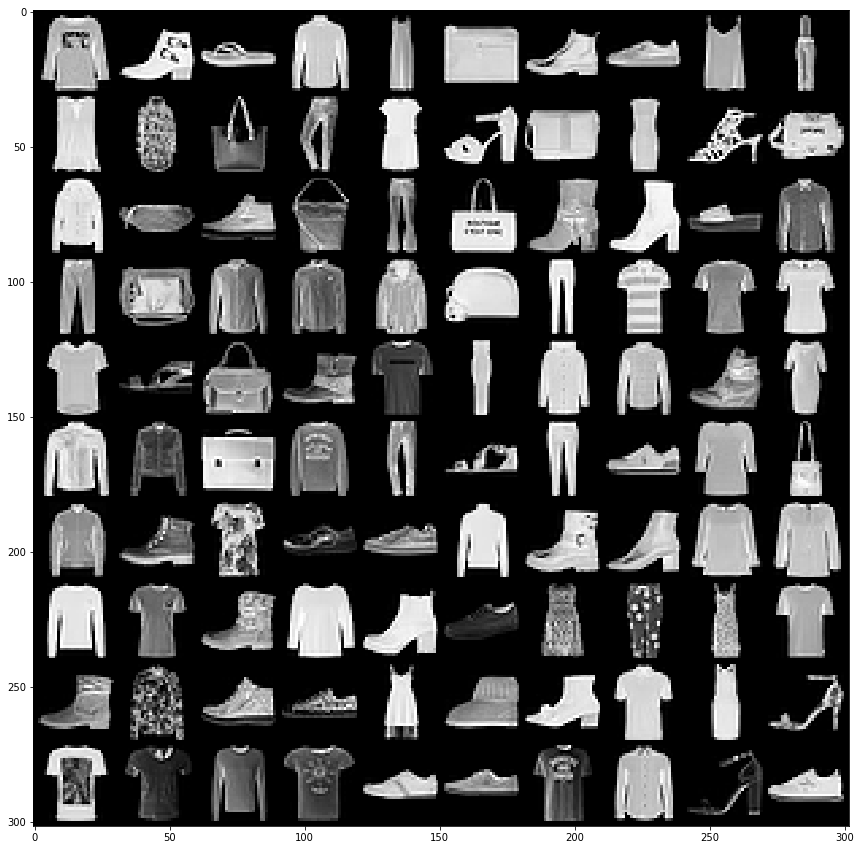

In [14]:
images, labels = batch

grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

print('labels: ', labels)

## Building model

In [15]:
# convolutional neural network
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

In [16]:
model = ConvNet(num_classes).to(device)

In [17]:
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [18]:
# train model
total_step = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.6005
Epoch [1/5], Step [200/600], Loss: 0.4016
Epoch [1/5], Step [300/600], Loss: 0.3059
Epoch [1/5], Step [400/600], Loss: 0.3381
Epoch [1/5], Step [500/600], Loss: 0.4382
Epoch [1/5], Step [600/600], Loss: 0.2411
Epoch [2/5], Step [100/600], Loss: 0.3249
Epoch [2/5], Step [200/600], Loss: 0.1871
Epoch [2/5], Step [300/600], Loss: 0.2621
Epoch [2/5], Step [400/600], Loss: 0.1731
Epoch [2/5], Step [500/600], Loss: 0.1751
Epoch [2/5], Step [600/600], Loss: 0.3281
Epoch [3/5], Step [100/600], Loss: 0.2405
Epoch [3/5], Step [200/600], Loss: 0.2533
Epoch [3/5], Step [300/600], Loss: 0.1749
Epoch [3/5], Step [400/600], Loss: 0.1810
Epoch [3/5], Step [500/600], Loss: 0.2282
Epoch [3/5], Step [600/600], Loss: 0.3373
Epoch [4/5], Step [100/600], Loss: 0.2023
Epoch [4/5], Step [200/600], Loss: 0.2724
Epoch [4/5], Step [300/600], Loss: 0.1596
Epoch [4/5], Step [400/600], Loss: 0.2516
Epoch [4/5], Step [500/600], Loss: 0.2474
Epoch [4/5], Step [600/600], Loss:

In [19]:
# test model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 10000 test images: 89.94 %
